In [1]:
import anndata as ad
import numpy as np
import scanpy as sc
import pandas as pd
import openpyxl
import csv
import matplotlib
import scipy.stats as sp
import xgboost as xgb
import pickle
from sklearn.metrics import confusion_matrix, adjusted_rand_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
import scrublet as scr

In [ ]:
# N1_LP

In [3]:
N1_LP = sc.read_10x_mtx('H:/data1/N1_LP/outs/filtered_feature_bc_matrix',var_names='gene_symbols', cache=False)
print(N1_LP)

AnnData object with n_obs × n_vars = 15178 × 32285
    var: 'gene_ids', 'feature_types'


In [5]:
N1_LP.write_h5ad('F:/single cell data/LP_LGN/N1-LP.h5ad')

In [6]:
sc.pp.filter_cells(N1_LP, min_genes=200)#cell must have 200 non-zero-count features to stay
sc.pp.filter_genes(N1_LP, min_cells= 8)#gene must be in 5 cells to stay
mito_genes = N1_LP.var_names.str.startswith('mt-')# for each cell compute fraction of counts in mito genes vs. all genes
N1_LP.obs['percent_mito'] = np.sum(N1_LP[:, mito_genes].X, axis =1)/np.sum(N1_LP.X, axis=1) # add each cell's fraction mito accounts as an obs annotation
N1_LP.obs['n_counts'] =N1_LP.X.sum(axis=1) # add the total counts per cell as observations-annotation

In [7]:
N1_LP

AnnData object with n_obs × n_vars = 15178 × 20412
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'n_cells'

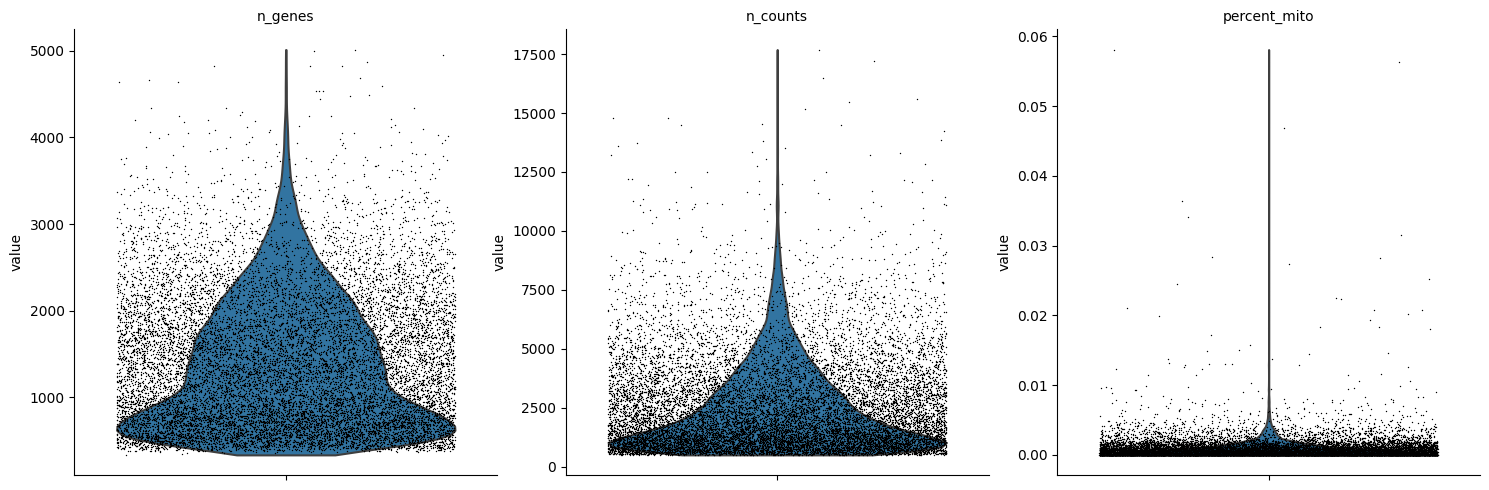

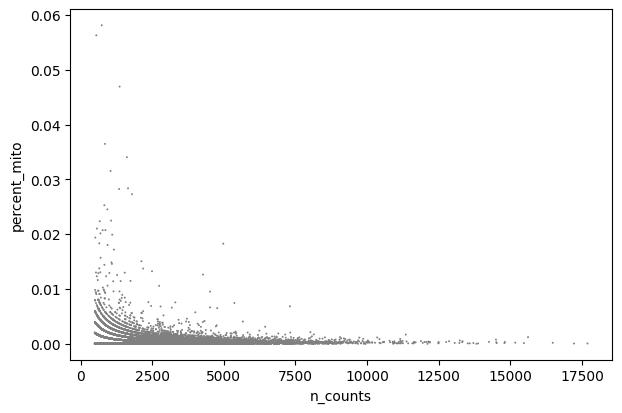

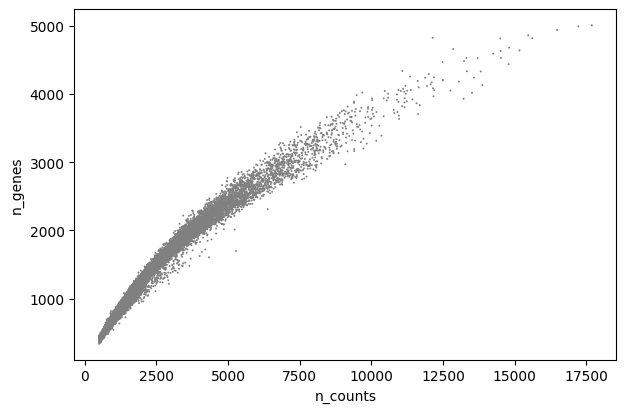

In [8]:
sc.pl.violin(N1_LP, ['n_genes', 'n_counts','percent_mito'], jitter =0.4, multi_panel= True)
sc.pl.scatter(N1_LP, x= 'n_counts', y= 'percent_mito')
sc.pl.scatter(N1_LP, x= 'n_counts', y= 'n_genes')

In [9]:
N1_LP = N1_LP[N1_LP.obs.percent_mito < 0.01,:]
N1_LP = N1_LP[N1_LP.obs['n_genes']< 4000,:]
N1_LP = N1_LP[N1_LP.obs['n_counts'] < 10000, :]

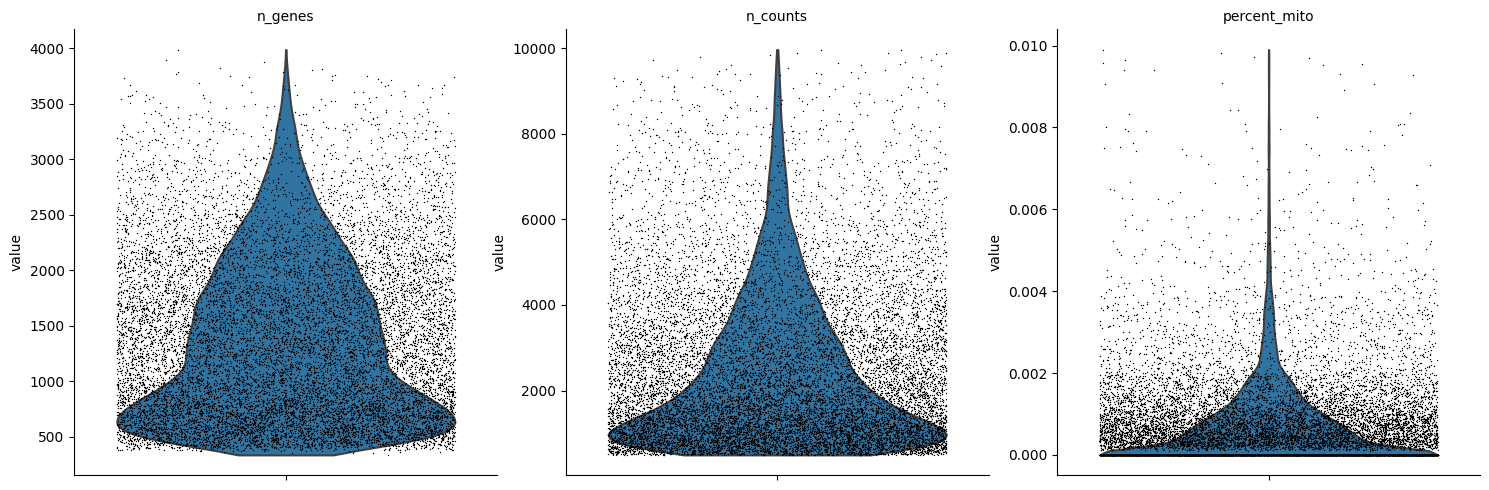

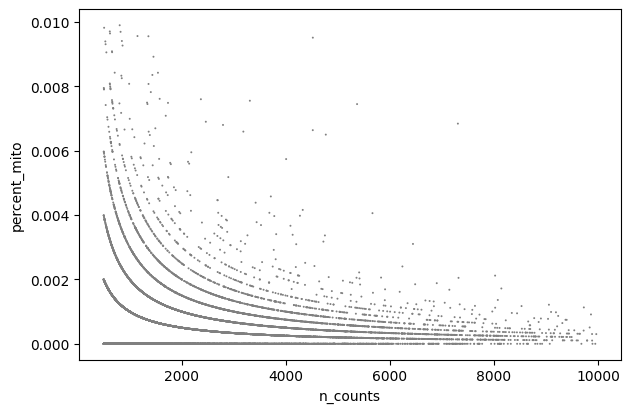

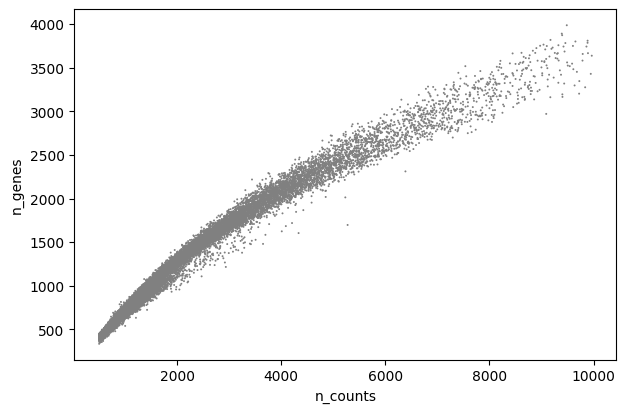

In [10]:
sc.pl.violin(N1_LP, ['n_genes', 'n_counts','percent_mito'], jitter =0.4, multi_panel= True)
sc.pl.scatter(N1_LP, x= 'n_counts', y= 'percent_mito')
sc.pl.scatter(N1_LP, x= 'n_counts', y= 'n_genes')

In [11]:
counts_matrix = N1_LP.X
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate= 0.06)
doublet_scores, precdicted_doublets = scrub.scrub_doublets(min_cells= 8, min_gene_variability_pctl= 85, n_prin_comps=40)
N1_LP.obs['Doublet'] = scrub.predicted_doublets_
N1_LP.obs['Doublet Score'] = scrub.doublet_scores_obs_
N1_LP = N1_LP[N1_LP.obs['Doublet']== False,:]
print(N1_LP)
N1_LP.write_h5ad('F:/single cell data/LP_LGN/N1-LP_filter.h5ad')

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.18
Detected doublet rate = 9.0%
Estimated detectable doublet fraction = 61.1%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 14.8%
Elapsed time: 22.8 seconds
View of AnnData object with n_obs × n_vars = 13688 × 20412
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score'
    var: 'gene_ids', 'feature_types', 'n_cells'


C:\Users\Wang Lin\AppData\Local\Temp\ipykernel_31788\1179328890.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  N1_LP.obs['Doublet'] = scrub.predicted_doublets_


In [ ]:
# N2_LP

In [13]:
N2_LP = sc.read_10x_mtx('H:/data1/N2_LP/outs/filtered_feature_bc_matrix',var_names='gene_symbols', cache=False)
print(N2_LP)
N2_LP.write_h5ad('F:/single cell data/LP_LGN/N2-LP.h5ad')

AnnData object with n_obs × n_vars = 15678 × 32285
    var: 'gene_ids', 'feature_types'


In [14]:
sc.pp.filter_cells(N2_LP, min_genes=200)#cell must have 200 non-zero-count features to stay
sc.pp.filter_genes(N2_LP, min_cells= 8)#gene must be in 5 cells to stay
mito_genes = N2_LP.var_names.str.startswith('mt-')# for each cell compute fraction of counts in mito genes vs. all genes
N2_LP.obs['percent_mito'] = np.sum(N2_LP[:, mito_genes].X, axis =1)/np.sum(N2_LP.X, axis=1) # add each cell's fraction mito accounts as an obs annotation
N2_LP.obs['n_counts'] =N2_LP.X.sum(axis=1) # add the total counts per cell as observations-annotation

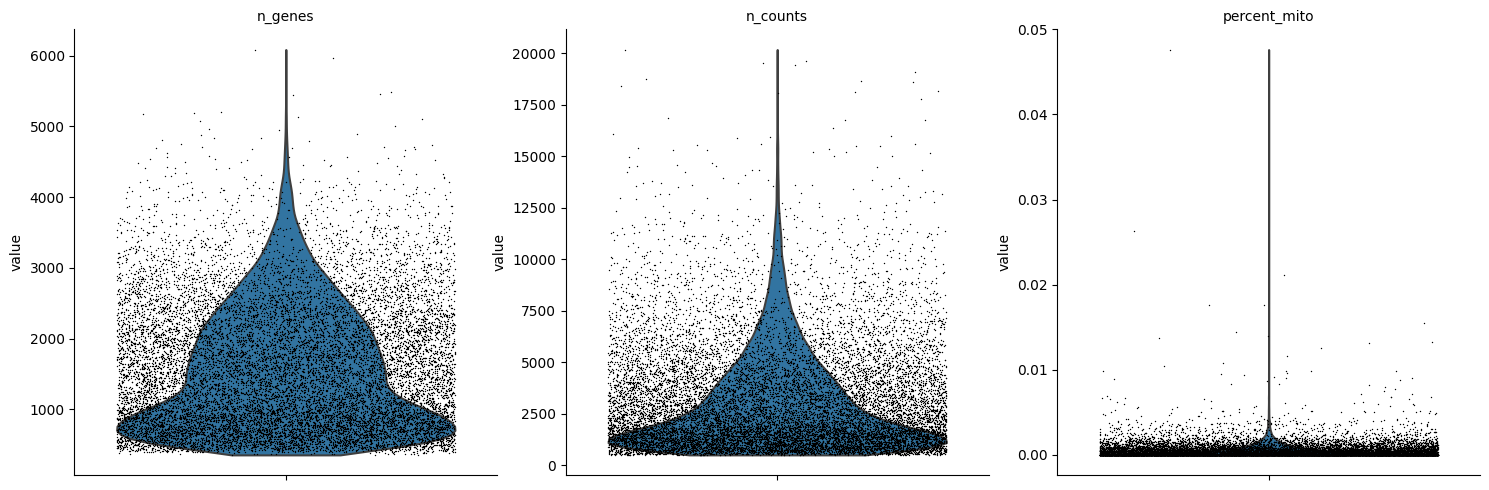

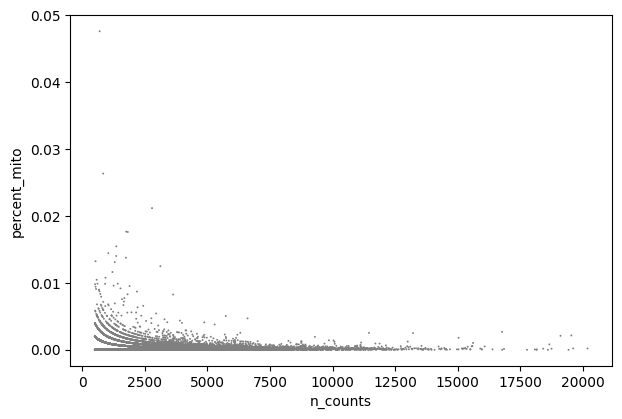

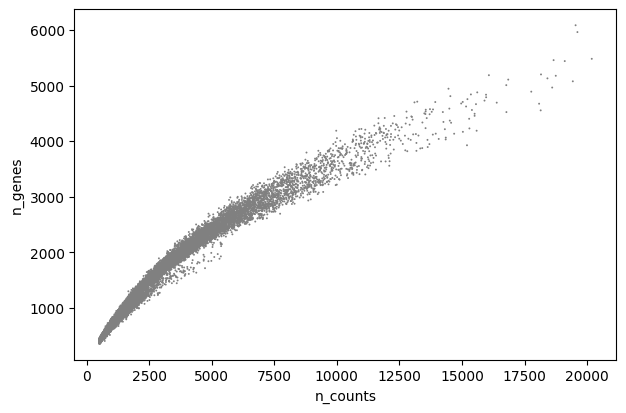

In [15]:
sc.pl.violin(N2_LP, ['n_genes', 'n_counts','percent_mito'], jitter =0.4, multi_panel= True)
sc.pl.scatter(N2_LP, x= 'n_counts', y= 'percent_mito')
sc.pl.scatter(N2_LP, x= 'n_counts', y= 'n_genes')

In [16]:
N2_LP = N2_LP[N2_LP.obs.percent_mito < 0.01,:]
N2_LP = N2_LP[N2_LP.obs['n_genes']< 4000,:]
N2_LP = N2_LP[N2_LP.obs['n_counts'] < 10000, :]

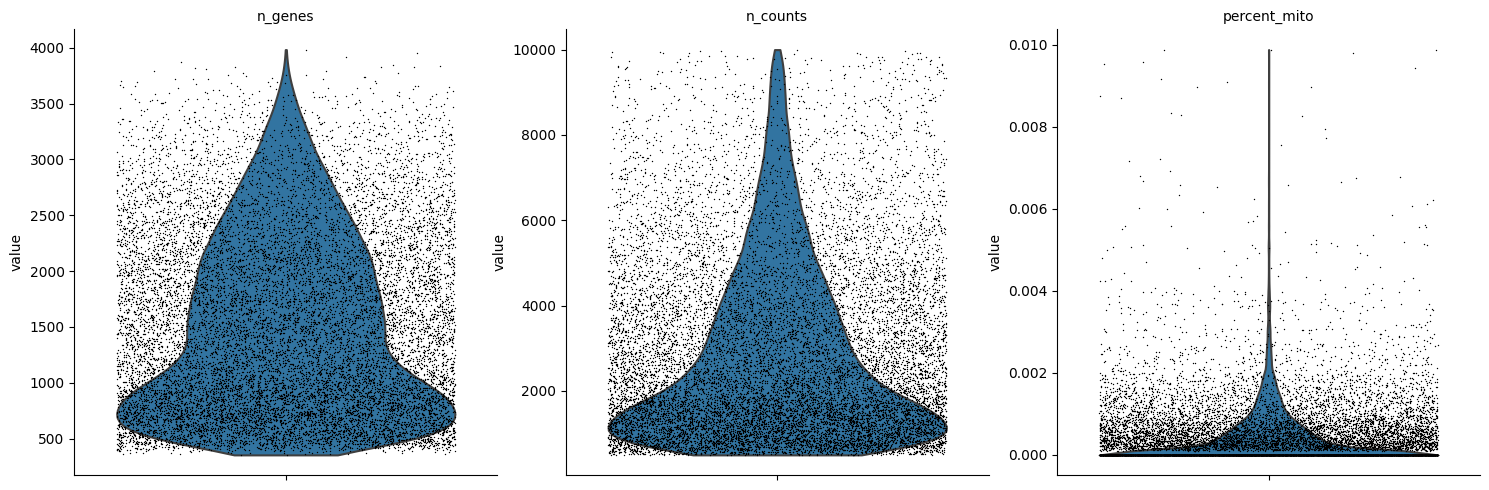

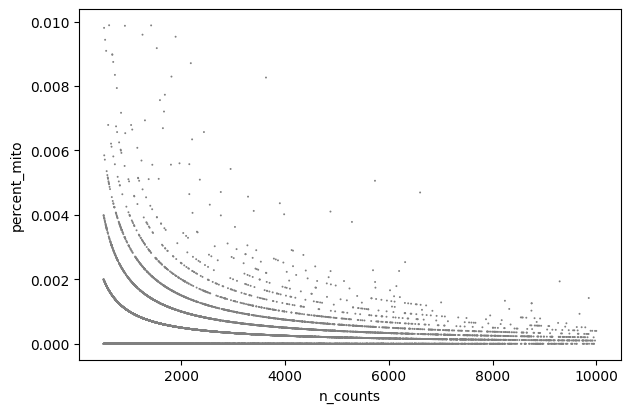

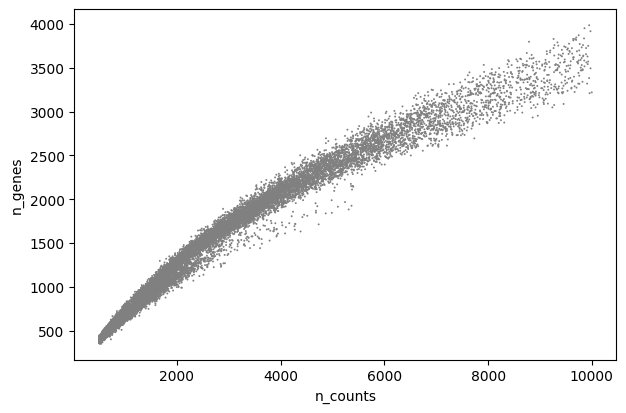

In [17]:
sc.pl.violin(N2_LP, ['n_genes', 'n_counts','percent_mito'], jitter =0.4, multi_panel= True)
sc.pl.scatter(N2_LP, x= 'n_counts', y= 'percent_mito')
sc.pl.scatter(N2_LP, x= 'n_counts', y= 'n_genes')

In [18]:
counts_matrix = N2_LP.X
scrub = scr.Scrublet(counts_matrix, expected_doublet_rate= 0.06)
doublet_scores, precdicted_doublets = scrub.scrub_doublets(min_cells= 8, min_gene_variability_pctl= 85, n_prin_comps=40)
N2_LP.obs['Doublet'] = scrub.predicted_doublets_
N2_LP.obs['Doublet Score'] = scrub.doublet_scores_obs_
N2_LP = N2_LP[N2_LP.obs['Doublet']== False,:]
print(N2_LP)
N2_LP.write_h5ad('F:/single cell data/LP_LGN/N2-LP_filter.h5ad')

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.17
Detected doublet rate = 9.3%
Estimated detectable doublet fraction = 62.8%
Overall doublet rate:
	Expected   = 6.0%
	Estimated  = 14.8%
Elapsed time: 22.0 seconds
View of AnnData object with n_obs × n_vars = 13921 × 20808
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score'
    var: 'gene_ids', 'feature_types', 'n_cells'


C:\Users\Wang Lin\AppData\Local\Temp\ipykernel_31788\3350887952.py:4: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  N2_LP.obs['Doublet'] = scrub.predicted_doublets_


In [ ]:
# N1_LP&N2_LP

In [20]:
N1_LP=sc.read_h5ad('F:/single cell data/LP_LGN/N1-LP_filter.h5ad')
N2_LP=sc.read_h5ad('F:/single cell data/LP_LGN/N2-LP_filter.h5ad')

E:\Python\lib\site-packages\anndata\_core\anndata.py:1763: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 27609 × 20091
    obs: 'n_genes', 'percent_mito', 'n_counts', 'Doublet', 'Doublet Score', 'sample'
    var: 'gene_ids', 'feature_types', 'n_cells-N1_LP', 'n_cells-N2_LP'


E:\Python\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


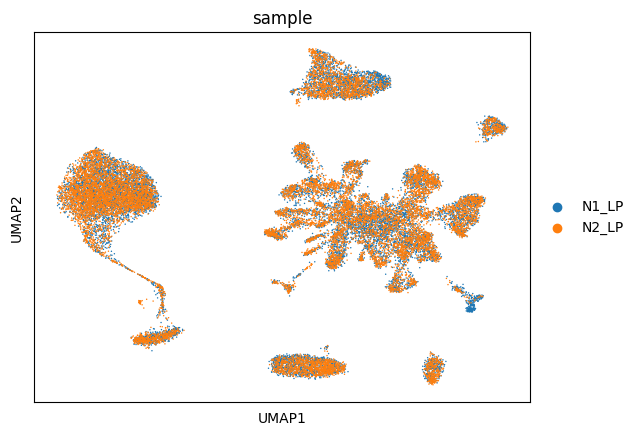

In [21]:
N_LP =sc.AnnData.concatenate(N1_LP, N2_LP,batch_categories=['N1_LP','N2_LP'],batch_key='sample')
print(N_LP)
N_LP.write_h5ad('F:/single cell data/LP_LGN/N_LP_preHVG.h5ad')
sc.pp.normalize_per_cell(N_LP,counts_per_cell_after= 1e4)
sc.pp.log1p(N_LP)
sc.pp.highly_variable_genes(N_LP, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.tl.pca(N_LP,svd_solver='arpack')
#sc.external.pp.harmony_integrate(N_LP,key='sample')
sc.pp.neighbors(N_LP,n_neighbors=25, n_pcs=40)
sc.tl.leiden(N_LP,resolution=1.5)
sc.tl.umap(N_LP)
sc.pl.umap(N_LP, color='sample',save='N_LP_harony_sample.svg')
N_LP.write_h5ad('F:/single cell data/LP_LGN/N_LP_HVG.h5ad')